In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
def load_data():
    """Load data from the CSV files referundum/regions/departments."""
    referendum = pd.read_csv('data/referendum.csv', sep=';')
    regions = pd.read_csv('data/regions.csv')
    departments = pd.read_csv('data/departments.csv')

    return referendum, regions, departments

In [3]:
referendum, regions, departments = load_data()

In [4]:
regions.head()

,id,code,name,slug
0,1,01,Guadeloupe,guadeloupe
1,2,02,Martinique,martinique
2,3,03,Guyane,guyane
3,4,04,La Réunion,la reunion
4,5,06,Mayotte,mayotte


In [5]:
departments.head()

,id,region_code,code,name,slug
0,1,84,01,Ain,ain
1,2,32,02,Aisne,aisne
2,3,84,03,Allier,allier
3,4,93,04,Alpes-de-Haute-Provence,alpes de haute provence
4,5,93,05,Hautes-Alpes,hautes alpes


In [114]:
def merge_regions_and_departments(regions, departments):
    """Merge regions and departments in one DataFrame.

    The columns in the final DataFrame should be:
    ['code_reg', 'name_reg', 'code_dep', 'name_dep']
    """
    df = pd.merge(regions[['code', 'name']], departments[['region_code','code','name']], left_on='code', right_on='region_code', suffixes=('_reg', '_dep'))
    del df['region_code']
    return df

In [115]:
regions_and_departments = merge_regions_and_departments(regions, departments)

In [111]:
regions_and_departments.shape

(18, 3)

In [9]:
regions_and_departments.tail(30)

,code_reg,name_reg,code_dep,name_dep
79,76,Occitanie,81,Tarn
80,76,Occitanie,82,Tarn-et-Garonne
81,84,Auvergne-Rhône-Alpes,01,Ain
82,84,Auvergne-Rhône-Alpes,03,Allier
83,84,Auvergne-Rhône-Alpes,07,Ardèche
84,84,Auvergne-Rhône-Alpes,15,Cantal
85,84,Auvergne-Rhône-Alpes,26,Drôme
86,84,Auvergne-Rhône-Alpes,38,Isère
87,84,Auvergne-Rhône-Alpes,42,Loire
88,84,Auvergne-Rhône-Alpes,43,Haute-Loire


In [10]:
referendum.tail(200)

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
36591,ZA,GUADELOUPE,129,Sainte-Rose,14156,6992,490,4603,2071
36592,ZA,GUADELOUPE,130,Terre-de-Bas,1652,1181,6,354,111
36593,ZA,GUADELOUPE,131,Terre-de-Haut,1690,894,23,344,429
36594,ZA,GUADELOUPE,132,Trois-Rivières,7083,2914,330,2394,1445
36595,ZA,GUADELOUPE,133,Vieux-Fort,1514,644,44,621,205
...,...,...,...,...,...,...,...,...,...
36786,ZZ,FRANCAIS DE L'ETRANGER,7,Europe centrale,89643,54981,318,17055,17289
36787,ZZ,FRANCAIS DE L'ETRANGER,8,"Europe du Sud, Turquie, Israël",109763,84466,292,9299,15706
36788,ZZ,FRANCAIS DE L'ETRANGER,9,Afrique Nord-Ouest,98997,59887,321,22116,16673
36789,ZZ,FRANCAIS DE L'ETRANGER,10,"Afrique Centre, Sud et Est",89859,46782,566,17008,25503


In [67]:
referendum.shape

(36791, 9)

In [68]:
ref = referendum.copy()

In [261]:
referendum.loc[referendum['Department code'].str.contains('Z')==False]

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B
0,1,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345
1,1,AIN,2,L'Abergement-de-Varey,215,36,5,66,108
2,1,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664
3,1,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684
4,1,AIN,6,Ambléon,105,17,1,35,52
...,...,...,...,...,...,...,...,...,...
36560,95,VAL D'OISE,676,Villers-en-Arthies,382,64,5,87,226
36561,95,VAL D'OISE,678,Villiers-Adam,595,71,4,191,329
36562,95,VAL D'OISE,680,Villiers-le-Bel,13269,4083,224,5546,3416
36563,95,VAL D'OISE,682,Villiers-le-Sec,95,11,0,40,44


In [17]:
def merge_referendum_and_areas(referendum, regions_and_departments):
    """Merge referendum and regions_and_departments in one DataFrame.

    You can drop the lines relative to DOM-TOM-COM departments, and the
    french living abroad.
    'Department code', 'Department name', 'Town code', 'Town name',
        'Registered', 'Abstentions', 'Null', 'Choice A', 'Choice B',
        'code_dep', 'code_reg', 'name_reg', 'name_dep'
    """
    ref = referendum.drop(referendum[referendum['Department code'].str.startswith('Z')].index)
    ref['Department code'] = ref['Department code'].str.zfill(2)
    df = pd.merge(ref, regions_and_departments, 
                  left_on='Department code', right_on='code_dep')
    return df

In [18]:
referendum_and_areas = merge_referendum_and_areas(referendum, regions_and_departments)

In [19]:
referendum_and_areas

,Department code,Department name,Town code,Town name,Registered,Abstentions,Null,Choice A,Choice B,code_reg,name_reg,code_dep,name_dep
0,01,AIN,1,L'Abergement-Clémenciat,592,84,9,154,345,84,Auvergne-Rhône-Alpes,01,Ain
1,01,AIN,2,L'Abergement-de-Varey,215,36,5,66,108,84,Auvergne-Rhône-Alpes,01,Ain
2,01,AIN,4,Ambérieu-en-Bugey,8205,1698,126,2717,3664,84,Auvergne-Rhône-Alpes,01,Ain
3,01,AIN,5,Ambérieux-en-Dombes,1152,170,18,280,684,84,Auvergne-Rhône-Alpes,01,Ain
4,01,AIN,6,Ambléon,105,17,1,35,52,84,Auvergne-Rhône-Alpes,01,Ain
...,...,...,...,...,...,...,...,...,...,...,...,...,...
36560,95,VAL D'OISE,676,Villers-en-Arthies,382,64,5,87,226,11,Île-de-France,95,Val-d'Oise
36561,95,VAL D'OISE,678,Villiers-Adam,595,71,4,191,329,11,Île-de-France,95,Val-d'Oise
36562,95,VAL D'OISE,680,Villiers-le-Bel,13269,4083,224,5546,3416,11,Île-de-France,95,Val-d'Oise
36563,95,VAL D'OISE,682,Villiers-le-Sec,95,11,0,40,44,11,Île-de-France,95,Val-d'Oise


In [20]:
referendum_and_areas.shape

(36565, 13)

In [21]:
def compute_referendum_result_by_regions(referendum_and_areas):
    """Return a table with the absolute count for each region.

    The return DataFrame should be indexed by `code_reg` and have columns:
    ['name_reg', 'Registered', 'Abstentions', 'Null', 'Choice A', 'Choice B']
    """
    df = referendum_and_areas.copy()
    del df['Town code']
    df = df.groupby(['code_reg', 'name_reg'], as_index=False).agg('sum')
    df = df.set_index('code_reg')
    return df

In [32]:
referendum_result_by_regions = compute_referendum_result_by_regions(
        referendum_and_areas)

In [33]:
referendum_result_by_regions

,name_reg,Registered,Abstentions,Null,Choice A,Choice B
code_reg,,,,,,
11,Île-de-France,6942361,1515884,85997,2536620,2803860
24,Centre-Val de Loire,1801366,326560,28827,590890,855089
27,Bourgogne-Franche-Comté,1997925,358321,33671,668246,937687
28,Normandie,2372779,426075,35513,816972,1094219
32,Hauts-de-France,4210444,866555,60601,1411257,1872031
44,Grand Est,3857089,783348,56951,1088684,1928106
52,Pays de la Loire,2605438,412509,47677,922468,1222784
53,Bretagne,2380594,364724,36077,944052,1035741
75,Nouvelle-Aquitaine,4201774,711017,71629,1641249,1777879


In [172]:
referendum_result_by_regions.columns

Index(['name_reg', 'Registered', 'Abstentions', 'Null', 'Choice A',
       'Choice B'],
      dtype='object')

In [173]:
referendum_result_by_regions.shape

(13, 6)

In [174]:
    referendum_result_by_regions = referendum_result_by_regions.set_index(
        'name_reg'
    )

In [175]:
referendum_result_by_regions['Registered'].sum()

40704055

In [28]:
df_geo = gpd.read_file('data/regions.geojson')

In [29]:
df_geo

,code,nom,geometry
0,11,Île-de-France,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ..."
1,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ..."
2,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ..."
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240..."
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ..."
5,44,Grand Est,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ..."
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46..."
7,53,Bretagne,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48..."
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45..."
9,01,Guadeloupe,"MULTIPOLYGON (((-61.63356 15.83977, -61.64798 ..."


In [105]:
def plot_referendum_map(referendum_result_by_regions):
    """Plot a map with the results from the referendum.

    * Load the geographic data with geopandas from `regions.geojson`.
    * Merge these info into `referendum_result_by_regions`.
    * Use the method `GeoDataFrame.plot` to display the result map. The results
      should display the rate of 'Choice A' over all expressed ballots.
    * Return a gpd.GeoDataFrame with a column 'ratio' containing the results.
    """
    df = gpd.read_file('data/regions.geojson')
    df = pd.merge(df, referendum_result_by_regions, left_on = 'code', right_on = 'code_reg')
    df['ratio'] = df['Choice A'] / (df['Choice A']+df['Choice B'])
    df.plot('ratio', legend=True)
    return df

C:\Users\remih\AppData\Roaming\Python\Python37\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


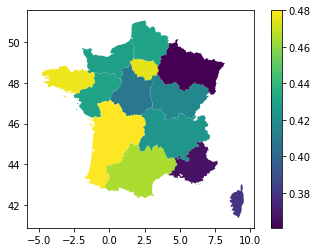

In [106]:
gdf_referendum = plot_referendum_map(referendum_result_by_regions)

C:\Users\remih\AppData\Roaming\Python\Python37\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


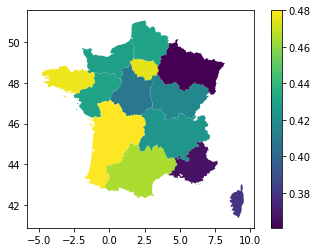

In [108]:
import numpy as np
def test_plot_referendum_map():
    referendum, df_reg, df_dep = load_data()
    regions_and_departments = merge_regions_and_departments(
        df_reg, df_dep
    )
    referendum_and_areas = merge_referendum_and_areas(
        referendum, regions_and_departments
    )
    referendum_result_by_regions = compute_referendum_result_by_regions(
        referendum_and_areas
    )
    gdf_referendum = plot_referendum_map(referendum_result_by_regions)

    assert isinstance(gdf_referendum, gpd.GeoDataFrame), (
        "The return object should be a GeoDataFrame, not a "
        f"{type(gdf_referendum)}."
    )
    assert 'ratio' in gdf_referendum.columns
    gdf_referendum = gdf_referendum.set_index('name_reg')
    assert np.isclose(gdf_referendum['ratio'].loc['Normandie'], 0.427467)
test_plot_referendum_map()

In [92]:
type(gdf_referendum)

geopandas.geodataframe.GeoDataFrame

In [107]:
gdf_referendum

,code,nom,geometry,name_reg,Registered,Abstentions,Null,Choice A,Choice B,ratio
0,11,Île-de-France,"POLYGON ((1.92215 48.45760, 1.92074 48.44775, ...",Île-de-France,6942361,1515884,85997,2536620,2803860,0.474980
1,24,Centre-Val de Loire,"POLYGON ((0.81482 48.67016, 0.82767 48.68072, ...",Centre-Val de Loire,1801366,326560,28827,590890,855089,0.408644
2,27,Bourgogne-Franche-Comté,"POLYGON ((6.94054 47.43337, 6.94168 47.41580, ...",Bourgogne-Franche-Comté,1997925,358321,33671,668246,937687,0.416111
3,28,Normandie,"POLYGON ((-1.11962 49.35557, -1.11503 49.36240...",Normandie,2372779,426075,35513,816972,1094219,0.427467
4,32,Hauts-de-France,"POLYGON ((4.14089 49.97876, 4.15398 49.97484, ...",Hauts-de-France,4210444,866555,60601,1411257,1872031,0.429830
5,44,Grand Est,"POLYGON ((3.41479 48.39027, 3.42208 48.41334, ...",Grand Est,3857089,783348,56951,1088684,1928106,0.360875
6,52,Pays de la Loire,"MULTIPOLYGON (((-2.30479 46.70942, -2.28612 46...",Pays de la Loire,2605438,412509,47677,922468,1222784,0.430004
7,53,Bretagne,"MULTIPOLYGON (((-2.12371 48.60441, -2.13448 48...",Bretagne,2380594,364724,36077,944052,1035741,0.476844
8,75,Nouvelle-Aquitaine,"MULTIPOLYGON (((-1.02574 45.57469, -0.99300 45...",Nouvelle-Aquitaine,4201774,711017,71629,1641249,1777879,0.480020
9,76,Occitanie,"MULTIPOLYGON (((1.78613 42.57362, 1.78094 42.5...",Occitanie,4008516,660914,62732,1528980,1755890,0.465461


C:\Users\remih\AppData\Roaming\Python\Python37\site-packages\geopandas\plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


<AxesSubplot:>

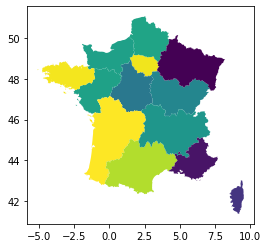

In [96]:
gdf_referendum.plot('ratio')